In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import collections

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [2]:
tempdata_dir = "../dshan_temp_data/"

res_name = "results1118.p"
indices_name = "allIDs.p"
indices_filter_name = "allIndNoZero.p"

In [3]:
def pkl_loader(file_name):
    with open(file_name, 'rb') as f:
        objct = pickle.load(f, encoding = 'bytes')
    return(objct)

In [4]:
res = pkl_loader(tempdata_dir + res_name)
indices = pkl_loader(tempdata_dir + indices_name)
indices_filter = pkl_loader(tempdata_dir + indices_filter_name)

# filter all non-zero indices
indices = np.array(indices)
indices_filter = np.array(indices_filter)
filtered_indices = indices[indices_filter]

In [5]:
# clean calculated hidden layer
hid = np.array(res['hid'])
target = np.array(res['label'])

hid_01 = np.array(hid)
hid_gn = np.array(hid)

# 0-1 normalization
for i in range(len(hid_01[0])):
    curmin, curmax = min(hid_01[:, i]), max(hid_01[:, i])
    if curmin == curmax:
        hid_01[:, i] -= curmin
    else:
        hid_01[:, i] = (hid_01[:, i] - curmin) / (curmax - curmin)

In [6]:
print (target)

[0 0 0 ... 0 0 0]


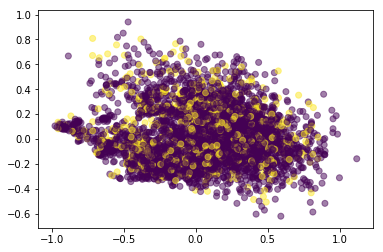

In [7]:
pca2 = PCA(2)
PCA2_hid_01 = pca2.fit_transform(hid_01)

fig_01norm = plt.figure()
plt.scatter(PCA2_hid_01[:, 0], PCA2_hid_01[:, 1], c = target, alpha=0.5)
plt.show()

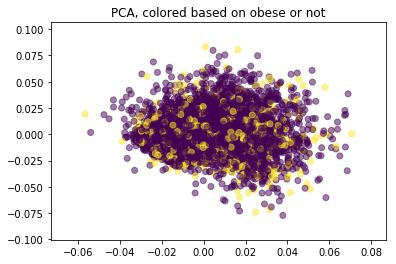

In [14]:
# Gaussian Normalization

hid_gn = normalize(hid_gn, axis = 0)
PCA2_hid_gn = pca2.fit_transform(hid_gn)

fig_Gnorm = plt.figure()
plt.scatter(PCA2_hid_gn[:, 0], PCA2_hid_gn[:, 1], c = target, alpha=0.5)
plt.title("PCA, colored based on obese or not")
plt.savefig("../dshan_temp_data/hid_PCA.png")
plt.show()

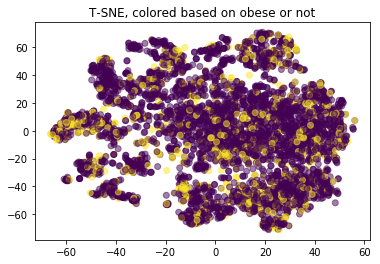

In [16]:
# T-SNE of Gaussian Normalized Hidden State
Embedded_hid_gn = TSNE(n_components = 2).fit_transform(hid_gn)

fig_TSNE1 = plt.figure()
plt.scatter(Embedded_hid_gn[:, 0], Embedded_hid_gn[:, 1], c = target, alpha = 0.5)
plt.title("T-SNE, colored based on obese or not")
plt.savefig("../dshan_temp_data/hid_TSNE.png")
plt.show()

In [9]:
# Agglomerative with ward
ward_labels = []
for num_cluster in range(2, 11):
    ward = AgglomerativeClustering(n_clusters = num_cluster, linkage = 'ward').fit(hid_gn)
    ward_labels.append(ward.labels_)

In [10]:
# K-Means
kmeans_labels = []
for num_cluster in range(1, 11):
    kmeans = KMeans(n_clusters = num_cluster, random_state = 0).fit(hid_gn)
    kmeans_labels.append(kmeans.labels_)

In [11]:
# Check the in-clutster obese/non-obese ratio of ward clustering
for ward_label in ward_labels:
    ward_unique, ward_counts = np.unique(ward_label, return_counts = True)
    print ("num clusters: " + str(len(ward_unique)))
    ward_count_dict = dict(zip(ward_unique, ward_counts))

    ward_content_check = collections.defaultdict(lambda: collections.defaultdict(int))
    for i in range(len(ward_label)):
        ward_content_check[ward_label[i]][target[i]] += 1
    for label in sorted(ward_unique):
        print ("clsuter label:" + str(label))
        print ("0:" + str(ward_content_check[label][0.0]))
        print ("1:" + str(ward_content_check[label][1.0]))
    print ("================")

num clusters: 2
clsuter label:0
0:2808
1:615
clsuter label:1
0:1220
1:292
num clusters: 3
clsuter label:0
0:1780
1:357
clsuter label:1
0:1220
1:292
clsuter label:2
0:1028
1:258
num clusters: 4
clsuter label:0
0:1028
1:258
clsuter label:1
0:1220
1:292
clsuter label:2
0:1283
1:272
clsuter label:3
0:497
1:85
num clusters: 5
clsuter label:0
0:1283
1:272
clsuter label:1
0:1220
1:292
clsuter label:2
0:630
1:147
clsuter label:3
0:497
1:85
clsuter label:4
0:398
1:111
num clusters: 6
clsuter label:0
0:630
1:147
clsuter label:1
0:1220
1:292
clsuter label:2
0:788
1:146
clsuter label:3
0:497
1:85
clsuter label:4
0:398
1:111
clsuter label:5
0:495
1:126
num clusters: 7
clsuter label:0
0:788
1:146
clsuter label:1
0:1220
1:292
clsuter label:2
0:495
1:126
clsuter label:3
0:497
1:85
clsuter label:4
0:398
1:111
clsuter label:5
0:372
1:81
clsuter label:6
0:258
1:66
num clusters: 8
clsuter label:0
0:1220
1:292
clsuter label:1
0:398
1:111
clsuter label:2
0:495
1:126
clsuter label:3
0:497
1:85
clsuter label:

In [12]:
# Check the in-clutster obese/non-obese ratio of KMeans clustering
for kmeans_label in kmeans_labels:
    kmeans_unique, kmeans_counts = np.unique(kmeans_label, return_counts = True)
    print ("num clusters: " + str(len(kmeans_unique)))
    kmeans_count_dict = dict(zip(kmeans_unique, kmeans_counts))

    kmeans_content_check = collections.defaultdict(lambda: collections.defaultdict(int))
    for i in range(len(kmeans_label)):
        kmeans_content_check[kmeans_label[i]][target[i]] += 1
    for label in sorted(kmeans_unique):
        print ("clsuter label:" + str(label))
        print ("0:" + str(kmeans_content_check[label][0.0]))
        print ("1:" + str(kmeans_content_check[label][1.0]))
    print ("================")

num clusters: 1
clsuter label:0
0:4028
1:907
num clusters: 2
clsuter label:0
0:1852
1:423
clsuter label:1
0:2176
1:484
num clusters: 3
clsuter label:0
0:1061
1:290
clsuter label:1
0:1901
1:435
clsuter label:2
0:1066
1:182
num clusters: 4
clsuter label:0
0:679
1:104
clsuter label:1
0:1720
1:399
clsuter label:2
0:804
1:224
clsuter label:3
0:825
1:180
num clusters: 5
clsuter label:0
0:533
1:79
clsuter label:1
0:1633
1:379
clsuter label:2
0:440
1:86
clsuter label:3
0:670
1:155
clsuter label:4
0:752
1:208
num clusters: 6
clsuter label:0
0:398
1:107
clsuter label:1
0:1546
1:356
clsuter label:2
0:500
1:70
clsuter label:3
0:536
1:143
clsuter label:4
0:617
1:140
clsuter label:5
0:431
1:91
num clusters: 7
clsuter label:0
0:1425
1:338
clsuter label:1
0:386
1:112
clsuter label:2
0:472
1:96
clsuter label:3
0:372
1:83
clsuter label:4
0:467
1:84
clsuter label:5
0:409
1:60
clsuter label:6
0:497
1:134
num clusters: 8
clsuter label:0
0:324
1:82
clsuter label:1
0:530
1:184
clsuter label:2
0:1047
1:195
cl